<p align="center">
  <img src="https://github.com/VictorGuevaraP/IA-DS_RESEARCH/blob/master/URPalma-1.png?raw=true" alt="GitHub Image" width="500px">
</p>

# **TALLER**
**Semana : Redes neuronales convolucionales** \
**Doc:** Victor Guevara \
**2024**

# Introducción

**Redes neuronales convolucionales - CNN**

Las CNN son un tipo especializado de DNN que utilizan una operación matemática llamada convolución en lugar de la multiplicación general de matrices en al menos una de sus capas. Una CNN se compone de una **capa de entrada**, **capas ocultas** y **una capa de salida.**

En cualquier red neuronal feed-forward, las capas intermedias entre la capa de entrada y la de salida se conocen como capas ocultas. Las capas ocultas toman un conjunto de entradas ponderadas y producen una salida mediante una función de activación.

**Las redes neuronales convolucionales** están diseñadas para funcionar con entradas estructuradas en cuadrícula, que tienen fuertes dependencias espaciales en regiones locales de la cuadrícula.

El ejemplo más obvio de datos estructurados en cuadrícula es una imagen bidimensional. Este tipo de datos también presenta dependencias espaciales, porque las ubicaciones espaciales adyacentes en una imagen a menudo tienen valores de color similares de los píxeles individuales. Una dimensión adicional captura los diferentes colores, lo que crea un volumen de entrada tridimensional. Por lo tanto, las características de una red neuronal convolucional tienen dependencias entre sí basadas en distancias espaciales.

Otras formas de datos secuenciales como texto, series temporales y secuencias también pueden considerarse casos especiales de datos estructurados en cuadrícula con varios tipos de relaciones entre elementos adyacentes. Por lo tanto, ocasionalmente también se han aplicado redes convolucionales a este tipo de datos.

Una ventaja de los datos de imágenes es que los efectos de entradas específicas en las representaciones de características a menudo se pueden describir de forma intuitiva.

Una característica definitoria importante de las redes neuronales convolucionales es una operación, a la que se hace referencia como convolución.

**Una operación de convolución** es una operación de producto escalar entre un conjunto de pesos estructurados en cuadrícula y entradas estructuradas en cuadrícula similares extraídas de diferentes localidades espaciales en el volumen de entrada. Este tipo de operación es útil para datos con un alto nivel de localidad espacial o de otro tipo, como datos de imágenes.

Por tanto, las redes neuronales convolucionales se definen como redes que utilizan la operación convolucional en al menos una capa, aunque la mayoría de las redes neuronales convolucionales utilizan esta operación en múltiples capas.

**Funcionamiento de las Capas de Convolución**

**Filtros o Kernels:** En una capa de convolución, se utilizan uno o más filtros (también conocidos como kernels), que son pequeñas matrices de pesos. Estos filtros se "deslizan" o convolucionan a lo largo y ancho de la imagen de entrada, realizando en cada posición una operación de producto punto entre el filtro y el fragmento de la imagen sobre el que se encuentra.

Los kernels en el procesamiento de imágenes son matrices utilizadas para aplicar efectos como el desenfoque, el afilado, el realce de bordes, entre otros, a través de una operación conocida como convolución. Cada tipo de kernel tiene una configuración específica que define el efecto que tendrá sobre la imagen.


> **Kernel de Identidad** Este kernel, como su nombre indica, no cambia la imagen. Actúa como un filtro de paso neutro. Un ejemplo de un kernel de identidad podría ser una matriz 3x3 donde todos los elementos son 0 excepto el elemento central que es 1. Esto hace que el valor de salida de cada píxel sea igual a su valor original.
$$
[0 0 0]
$$
$$
[0 1 0]
$$
$$
[0 0 0]
$$

> Kernel de Afilado (Sharpen) Los kernels de afilado realzan los bordes de una imagen, haciendo que las transiciones entre áreas de diferente intensidad sean más marcadas, lo que resulta en una imagen que parece visualmente más "afilada".
$$
\begin{aligned}
& {\left[\begin{array}{rrr}
0 & -1 & 0
\end{array}\right]} \\
& {\left[\begin{array}{rrr}
-1 & 5 & -1
\end{array}\right]} \\
& {\left[\begin{array}{rrr}
0 & -1 & 0
\end{array}\right]}
\end{aligned}
$$

> Kernel de Detección de Bordes: Existen varios kernels diseñados específicamente para resaltar los bordes dentro de una imagen. Estos kernels funcionan encontrando áreas de la imagen donde hay cambios bruscos en la intensidad de los píxeles. Ejemplos comunes incluyen el kernel de Sobel, Prewitt y el operador de Roberts.

$$
\begin{aligned}
& {\left[\begin{array}{lll}
-1 & -1 & -1
\end{array}\right]} \\
& {\left[\begin{array}{lll}
-1 & 8 & -1
\end{array}\right]} \\
& {\left[\begin{array}{lll}
-1 & -1 & -1
\end{array}\right]} \\
&
\end{aligned}
$$

> Kernel de Desenfoque (Blur)
Los kernels de desenfoque suavizan las transiciones de intensidad al promediar los píxeles dentro de una región, lo que resulta en una reducción de la nitidez y los detalles. Los kernels de desenfoque son útiles para reducir el ruido en una imagen.
Este kernel asigna un mayor peso al centro y promedia los píxeles circundantes para suavizar la imagen.

> Kernel de Realce (Emboss)
El realce puede ser utilizado para dar a una imagen un efecto como si estuviera grabada sobre una superficie, creando una ilusión de profundidad o textura.


**Mapas de Características (Feature Maps):** El resultado de aplicar un filtro sobre toda la imagen es un mapa de características. Este mapa indica las regiones donde se detectaron características específicas a las que el filtro es sensible, como bordes, esquinas o texturas. Cada filtro en una capa convolucional busca detectar una característica diferente, generando múltiples mapas de características.

**Stride:** Se refiere a los pasos que se dan al mover el filtro a través de la imagen. Un stride mayor significa que el filtro salta más píxeles, lo que generalmente resulta en mapas de características más pequeños.

**Padding:** Para controlar el tamaño de los mapas de características y permitir que el filtro se aplique completamente en los bordes de la imagen, se puede agregar un borde de píxeles (usualmente ceros) alrededor de la imagen, conocido como padding.

**Operación de Convolución:** Matemáticamente, la operación realizada por la capa de convolución es una convolución, aunque técnicamente en muchas implementaciones se realiza una operación correlacionada cruzada, lo cual es similar pero no invierte el filtro.

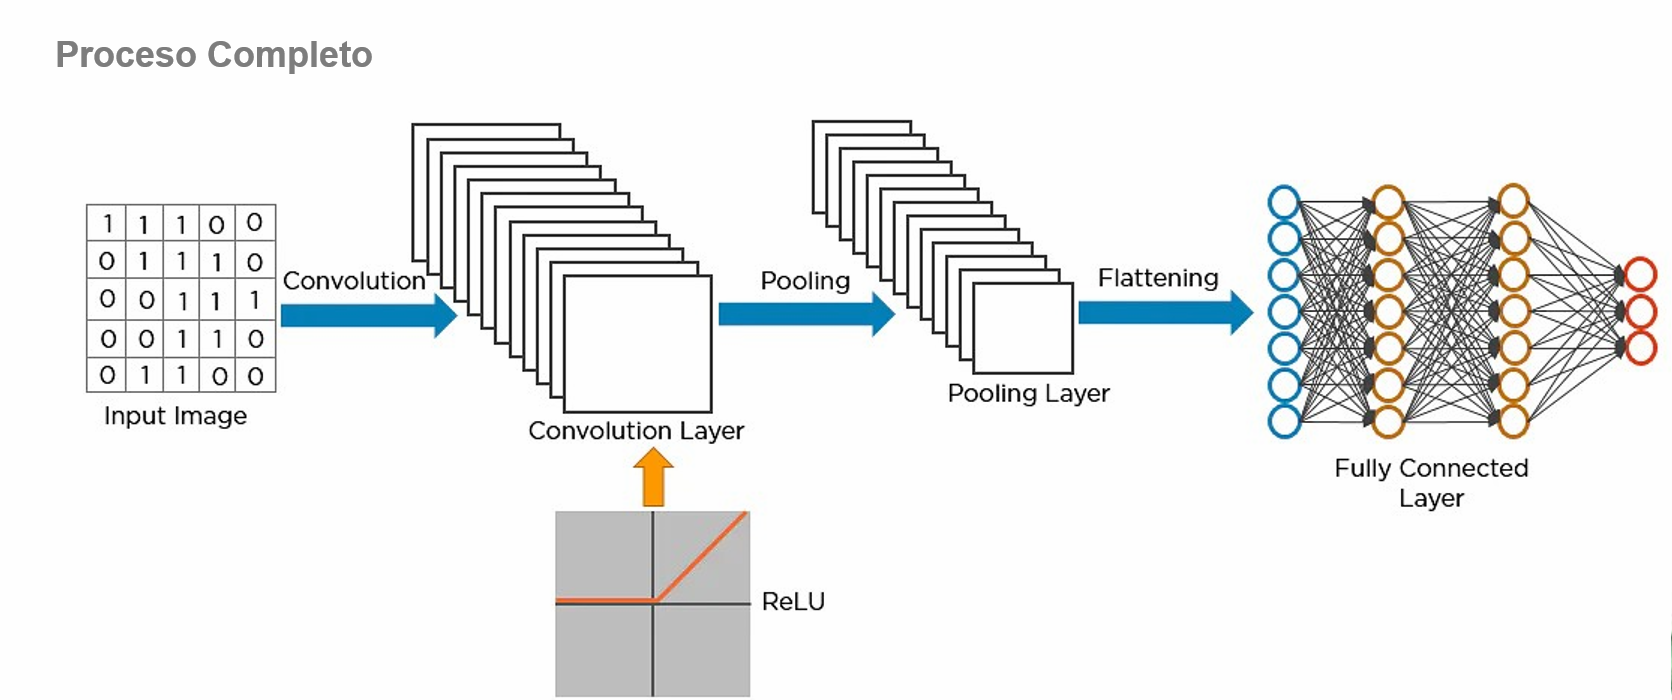

In [2]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.models import load_model


**MNIST DATABASE**

https://keras.io/api/datasets/mnist/

Este es un conjunto de datos de entrenemiento de 60 000 imágenes en escala de grises de 28x28 de 10 dígitos, junto con un conjunto de prueba de 10 000 imágenes. Se puede encontrar más información en la página de inicio del MNIST. http://yann.lecun.com/exdb/mnist/


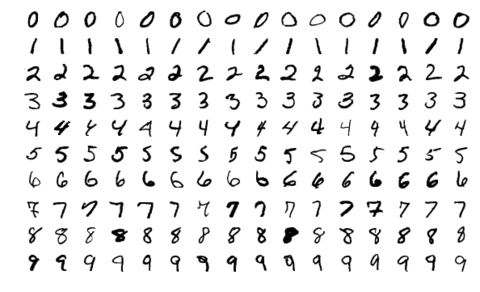

Fuente: https://en.wikipedia.org/wiki/MNIST_database


In [3]:
# Importar dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# Observar las dimensiones de la data de entrenamiento
train_images.shape

(60000, 28, 28)

In [5]:
# Observar las dimensiones de la data de test
test_images.shape

(10000, 28, 28)

In [6]:
# Observar target de la data train
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
# Observar las salidas
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [8]:
# dimensiones labels entrenamiento
train_labels.shape

(60000,)

In [9]:
# Observar target de la data test
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [10]:
# dimensiones labels entrenamiento
test_labels.shape

(10000,)

Primera imagen

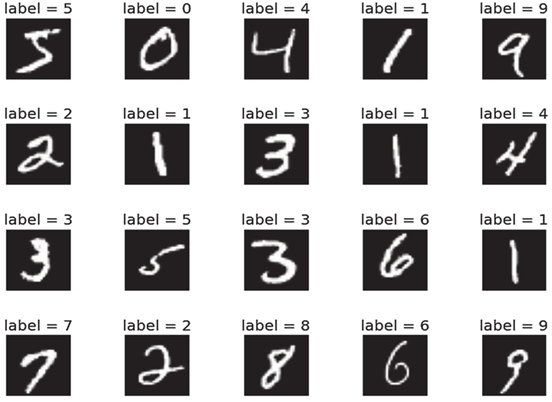

In [13]:
# Imprimir la primera imagen
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [14]:
# Imprimir la primera imagen
train_images[0].shape

(28, 28)

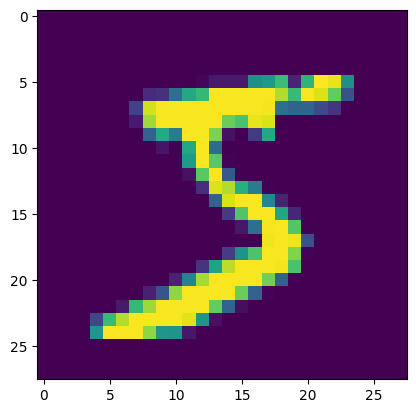

In [15]:
# Observar la primera imagen
plt.imshow(train_images[0]);

In [16]:
# Observar el valor máximo
train_images.max()

255

In [17]:
# Observar el valor mínimo
train_images.min()

0

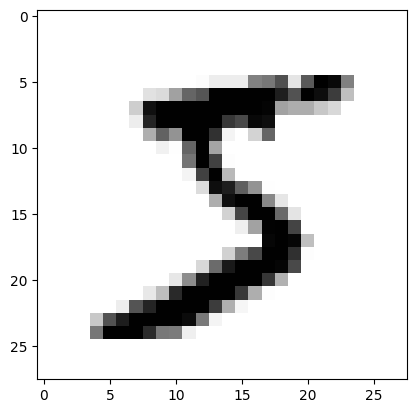

In [18]:
# Observar la primera imagen
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.show()
# plt.imshow(train_images[0],cmap='gray', vmin=0, vmax=255); # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html

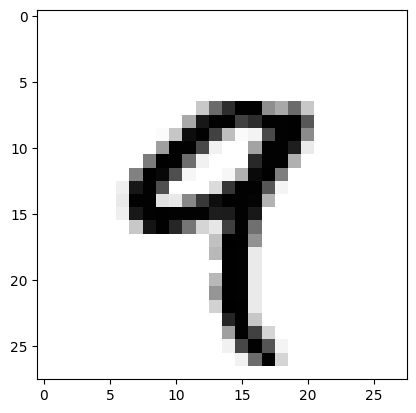

In [19]:
# Observar la Quinta imagen
plt.imshow(train_images[4], cmap=plt.cm.binary)
plt.show()
#plt.imshow(train_images[4],cmap='gray', vmin=0, vmax=255);

In [20]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

<ipython-input-18-fd8e0f5969df>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(train_labels, palette="CMRmap")


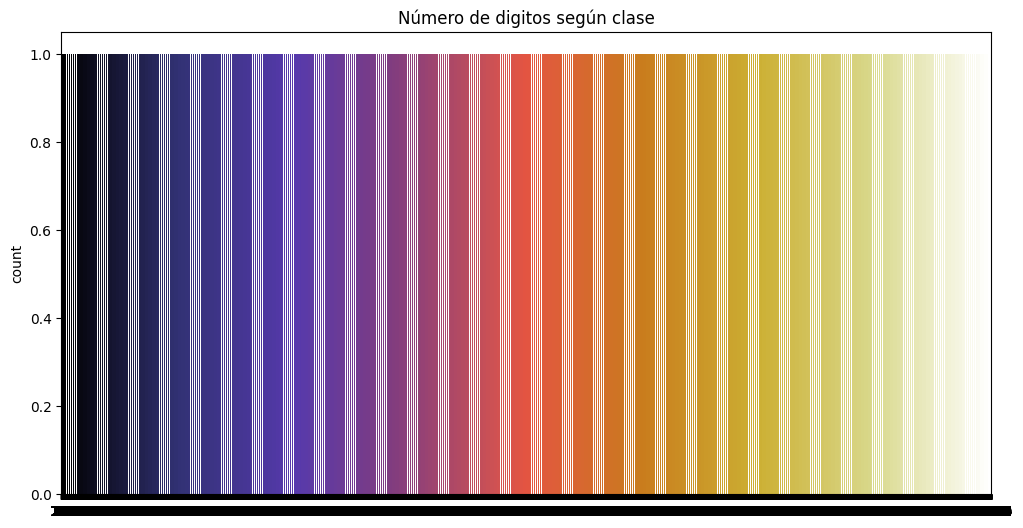

In [ ]:
# Observar la cantidad de imagenes según números
plt.figure(figsize=(12,6))
sns.countplot(train_labels, palette="CMRmap")
plt.title("Número de digitos según clase")
plt.show()

In [21]:
# Cantidad
np.bincount(train_labels)

array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949])

# Clasificación método tradicional

## Escalamiento de datos

In [22]:
# Aplicamos escalado a los datos de entrenamiento y prueba / 255 por le valor máximo (resultados entre 0 a 1)
train_images = train_images.astype("float32")/255
test_images = test_images.astype("float32")/255

In [23]:
# Observar los nuevos valores
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

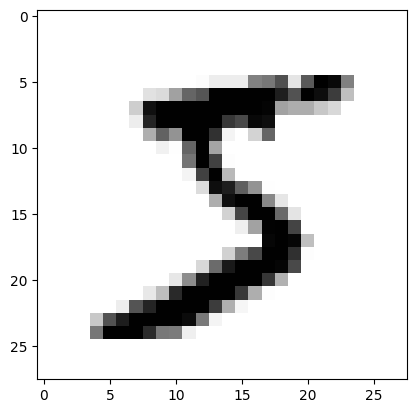

In [24]:
# Mostrar imagen
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.show()

In [25]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Tensor reshaping

Una operación de tensor que es esencial comprender es **tensor reshaping**.  en nuestro primer ejemplo de red neuronal, se usa cuando preprocesamos los datos de los dígitos antes de introducirlos en nuestro modelo

**tensor reshaping** significa reorganizar sus filas y columnas para que coincidan con una forma de destino. Naturalmente, el tensor remodelado tiene el mismo número total de coeficientes que el tensor inicial. La reshaping se entiende mejor a través de ejemplos simples:

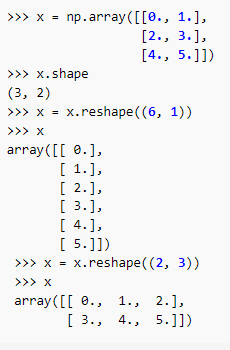

*Fuente: Deep Learning with Python, Second Edition* (Revisar)

In [26]:
# Dar nueva forma a la matriz.
train_images = train_images.reshape((60000, 28*28))

In [29]:
# Mostramos las dimensiones
train_images.shape

(60000, 784)

In [30]:
# Mostrar los resultados
train_images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [31]:
# Mostramos el primer registro
train_images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [32]:
# Dar nueva forma a la matriz.
test_images = test_images.reshape((10000, 28*28))

In [33]:
# Mostramos el primer
test_images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [34]:
# Mostramos las dimensiones
test_images.shape

(10000, 784)

In [35]:
224*224*3

150528

## Arquitectura ANN (tradicional)

Modelo consta de una secuencia de dos de capas Dense, que son capas neuronales densamente conectadas (también llamadas completamente conectadas ).
La segunda (y última) capa es una capa de clasificación softmax de 10 vías , lo que significadevolverá una matriz de 10 puntuaciones de probabilidad (que suman 1).

Arquitectura: [60 000 - 784 - 10]

In [43]:
# Arquitertura red neuronal
modelo=Sequential()
modelo.add(Dense(784, activation='relu'))
modelo.add(Dense(10, activation='softmax'))



In [44]:
modelo.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [45]:
modelo.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [46]:
# Ajustamos el modelo a los datos de entrenamiento
modelo.fit(train_images,train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.8801 - loss: 0.4262
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9705 - loss: 0.1041
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.9803 - loss: 0.0653
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9874 - loss: 0.0429
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9914 - loss: 0.0301


## Evaluar la calidad del modelo
Ahora que tenemos el modelo entrenado, podemos usarlo para predecir las probabilidades de clase de nuevos dígitos, imágenes que no formaban parte de los datos de entrenamiento, como las del conjunto de prueba.

[0:10]: 0,1,2,3,4,5,6,7,8,9

In [47]:
# Valores de salida
test_digitos = test_images[0:10]

In [48]:
# Utilizar el modelo para predecir
prediccion = modelo.predict(test_digitos)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


In [49]:
prediccion

array([[2.6319941e-07, 4.0757055e-08, 2.2749138e-05, 5.9049705e-04,
        6.8578254e-10, 1.0537271e-07, 7.5116156e-11, 9.9937028e-01,
        1.3153779e-05, 2.9629568e-06],
       [3.3087030e-08, 8.7467424e-06, 9.9999088e-01, 2.0561855e-07,
        5.8768217e-14, 3.1265049e-08, 9.0522914e-09, 8.6575479e-13,
        1.7277738e-07, 1.8396297e-11],
       [1.1817656e-06, 9.9924254e-01, 2.6840977e-05, 2.7221895e-06,
        1.0059393e-04, 7.2757775e-06, 3.9979590e-05, 3.3500019e-04,
        2.3965574e-04, 4.2926558e-06],
       [9.9939573e-01, 9.6941164e-07, 5.8192608e-04, 6.1078600e-07,
        6.3048583e-07, 1.6303354e-06, 9.7555258e-06, 6.9533617e-06,
        2.7335727e-08, 1.8011453e-06],
       [6.6693533e-06, 6.6493135e-07, 8.5584557e-05, 6.6041935e-08,
        9.6495581e-01, 5.6384994e-08, 3.4708140e-05, 2.0073311e-04,
        3.7941245e-05, 3.4677818e-02],
       [2.9727806e-08, 9.9956661e-01, 1.8854463e-07, 9.0152938e-08,
        2.0594807e-05, 8.8289021e-09, 8.7453586e-08, 4.06

In [57]:
# Verificamos el primer registro
prediccion[5]

array([2.9727806e-08, 9.9956661e-01, 1.8854463e-07, 9.0152938e-08,
       2.0594807e-05, 8.8289021e-09, 8.7453586e-08, 4.0687932e-04,
       5.4063007e-06, 2.4589545e-07], dtype=float32)

In [59]:
# La probabilidad máxima
prediccion[5].argmax()

1

In [62]:
# Solo probabilidad
prediccion[5][1]

0.9995666

In [63]:
# Valor en la data de prueba
test_labels[5]

1

In [64]:
#  la precisión promedio en todo el conjunto de prueba.
test_loss, test_acc = modelo.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9782 - loss: 0.0689


In [66]:
print("test_acc:" , test_acc)

test_acc: 0.9807999730110168


In [67]:
test_loss

0.0599784255027771

**Ojo**

Ejemplos de datos con tensores.

* **Datos vectoriales:** Rank-2 tensors de forma (samples, features), donde cada muestra es un vector de atributos numéricos ("características")

* **Datos de series temporales o datos de secuencia:** Rank-3 tensors de forma (samples, timesteps, features), donde cada muestra es una secuencia (de longitud timesteps) de vectores de características

* **Imágenes:** Rank-4 tensors de rango 4 (samples, height, width, channels), donde cada muestra es una cuadrícula 2D de píxeles, y cada píxel está representado por un vector de valores ("canales")

* **Video:** Rank-5 tensors de forma (samples, frames, height, width, channels, donde cada muestra es una secuencia (de longitud frames) de imágenes

# Datos de imagen

Las imágenes suelen tener tres dimensiones: alto, ancho y profundidad de color. Aunque las imágenes en escala de grises (como nuestros dígitos MNIST) tienen un solo canal de color y, por lo tanto, podrían almacenarse en tensores de rango 2, por convención, los tensores de imagen siempre son de rango 3, con un canal de color unidimensional para imágenes en escala de grises. Un lote de 128 imágenes en escala de grises de tamaño 256 × 256 podría almacenarse en un tensor de forma (128, 256, 256, 1), y ​​un lote de 128 imágenes en color podría almacenarse en un tensor de forma (128, 256, 256, 3)

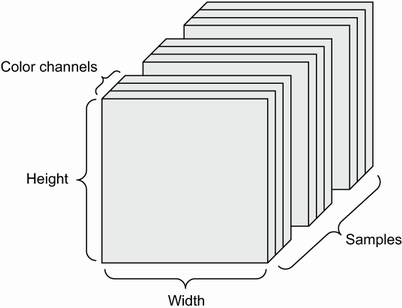


Hay dos convenciones para las formas de los tensores de imagen: la convención de los últimos canales (que esestándar en TensorFlow) y la convención de canales primero (que escayendo cada vez más en desgracia).

La convención de los últimos canales coloca el eje de profundidad de color al final: (samples, height, width, color_depth). Mientras tanto, la convención de canales primero coloca el eje de profundidad de color justo después del eje de lote: (samples, color_depth, height, width). Con la convención de canales primero, los ejemplos anteriores se convertirían en (128, 1, 256, 256)y (128, 3, 256, 256). La API de Keras brinda soporte para ambos formatos.

# Redes neuronales convolucionales

In [68]:
# Importar dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [69]:
# Aplicamos escalado a los datos de entrenamiento y prueba / 255 por le valor máximo (resultados entre 0 a 1)
train_images = train_images.astype("float32")/255
test_images = test_images.astype("float32")/255

Las salidas estan representadas en número único, (no es un problema de regresión), por lo tanto debe ser representada en un matriz de unos y ceros mediante la codificación "One hot"

In [70]:
# Salidas entrenamiento
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [71]:
# Representación de la transformación "one-hot"
sal= np.arange(10)

for label in range(10):
    one_hot = (sal==label).astype(int)
    print("label: ", label, " transformación one-hot : ", one_hot);

label:  0  transformación one-hot :  [1 0 0 0 0 0 0 0 0 0]
label:  1  transformación one-hot :  [0 1 0 0 0 0 0 0 0 0]
label:  2  transformación one-hot :  [0 0 1 0 0 0 0 0 0 0]
label:  3  transformación one-hot :  [0 0 0 1 0 0 0 0 0 0]
label:  4  transformación one-hot :  [0 0 0 0 1 0 0 0 0 0]
label:  5  transformación one-hot :  [0 0 0 0 0 1 0 0 0 0]
label:  6  transformación one-hot :  [0 0 0 0 0 0 1 0 0 0]
label:  7  transformación one-hot :  [0 0 0 0 0 0 0 1 0 0]
label:  8  transformación one-hot :  [0 0 0 0 0 0 0 0 1 0]
label:  9  transformación one-hot :  [0 0 0 0 0 0 0 0 0 1]


In [72]:
# Transformación "One_Hot" salidas entrenamiento
train_labels_cat = to_categorical(train_labels)

In [73]:
# Mostrar resultados
train_labels_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [74]:
# Dimensión Salidas - entrenamiento
train_labels_cat.shape

(60000, 10)

In [75]:
# Salidas para el primer registro (salida)
train_labels_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [76]:
# Salidas para el quinto registro (salida)
train_labels_cat[4]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [77]:
# Transformación "One_Hot" salidas test
test_labels_cat = to_categorical(test_labels)

In [78]:
# Mostrar resultados
test_labels_cat

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# CNN

In [80]:
# Arquitertura red neuronal
modelo_cnn=Sequential()
modelo_cnn.add(Conv2D(filters=16, kernel_size=(3,3),
                      strides=(1, 1), activation='relu',input_shape=(28, 28, 1)))
modelo_cnn.add(MaxPool2D(pool_size=(3, 3)))
modelo_cnn.add(Flatten())

#modelo_cnn.add(Dense(381))
#modelo_cnn.add(Dense(200))
modelo_cnn.add(Dense(10, activation='softmax'))

In [81]:
# compilar utilizar optimizador y loss
modelo_cnn.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [82]:
# Resumen modelo
modelo_cnn.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,410 (40.66 KB)

 Trainable params: 10,410 (40.66 KB)

 Non-trainable params: 0 (0.00 B)

In [83]:
# Ajustar a los datos
modelo_cnn.fit(train_images,train_labels_cat,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8582 - loss: 0.5478
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.9650 - loss: 0.1196
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 10ms/step - accuracy: 0.9728 - loss: 0.0892
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9786 - loss: 0.0733
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.9804 - loss: 0.0667
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9827 - loss: 0.0587
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9843 - loss: 0.0524
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9843 - loss: 0.0514
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9870 - loss: 0.0447
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9872 - loss: 0.0424


In [84]:
# verificar las métricas
modelo_cnn.metrics_names

['loss', 'compile_metrics']

In [85]:
# Mostrar el historial
modelo_cnn.history.history

{'accuracy': [0.9219666719436646,
  0.9684833288192749,
  0.9742333292961121,
  0.9780666828155518,
  0.9806166887283325,
  0.9818999767303467,
  0.9835166931152344,
  0.984749972820282,
  0.9860666394233704,
  0.9868000149726868],
 'loss': [0.28707873821258545,
  0.10898901522159576,
  0.08467134088277817,
  0.07313933223485947,
  0.06495404988527298,
  0.059575628489255905,
  0.05454666167497635,
  0.05092046409845352,
  0.04761316999793053,
  0.04417844116687775]}

In [86]:
# Guardar
perdidas = pd.DataFrame(modelo_cnn.history.history)

In [87]:
# Mostrar
perdidas

,accuracy,loss
0,0.921967,0.287079
1,0.968483,0.108989
2,0.974233,0.084671
3,0.978067,0.073139
4,0.980617,0.064954
5,0.981900,0.059576
6,0.983517,0.054547
7,0.984750,0.050920
8,0.986067,0.047613
9,0.986800,0.044178


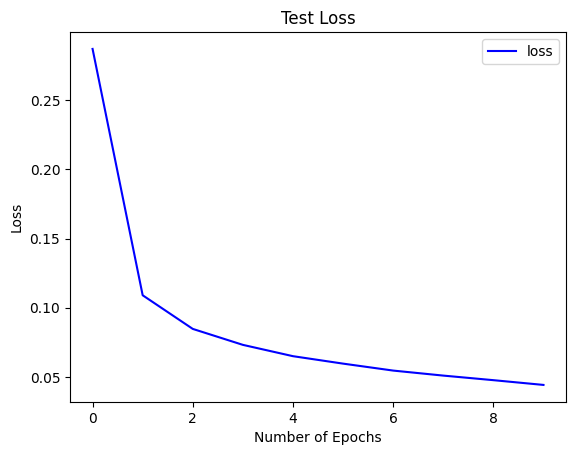

In [88]:
# Graficar
plt.plot(perdidas['loss'], color='b', label="loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

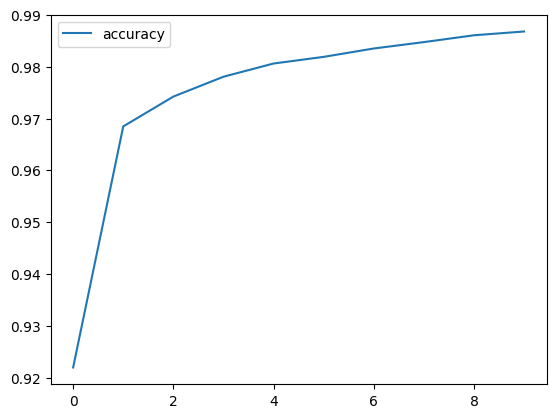

In [90]:
# Graficar
perdidas[['accuracy']].plot()
plt.show()

In [91]:
# Perdidas
perdidaF,accuraryF = modelo_cnn.evaluate(test_images,test_labels_cat,verbose=0)
print("Loss:", perdidaF)
print("Accurary:", accuraryF)

Loss: 0.054823730140924454
Accurary: 0.9815999865531921


Predecir para los datos de prueba

In [92]:
# predecir
predicciones = modelo_cnn.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [ ]:
predicciones

In [93]:
# Obtener el valor entero
predicciones=np.argmax(predicciones,axis=-1)

In [94]:
predicciones

array([7, 2, 1, ..., 4, 5, 6])

In [95]:
# Mostrar
predicciones[0]

7

In [96]:
# Verificar
test_labels_cat[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [ ]:
# Metricas e indicadores
print(classification_report(test_labels,predicciones))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.99      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.97      0.99      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.97      0.98      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.99      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [97]:
# Matriz de confusión
confusion_matrix(test_labels,predicciones)

array([[ 970,    0,    4,    0,    0,    2,    1,    1,    1,    1],
       [   0, 1126,    2,    2,    2,    1,    1,    1,    0,    0],
       [   2,    4, 1009,    4,    2,    0,    0,    5,    5,    1],
       [   0,    0,    4,  995,    0,    9,    0,    0,    1,    1],
       [   0,    0,    0,    0,  972,    0,    0,    0,    2,    8],
       [   1,    0,    1,    4,    0,  883,    2,    1,    0,    0],
       [   8,    3,    0,    0,    9,    3,  934,    0,    1,    0],
       [   1,    1,    8,    2,    4,    0,    0, 1005,    3,    4],
       [   6,    0,    5,    3,    4,    2,    1,    4,  942,    7],
       [   1,    1,    2,    2,    9,    4,    0,    9,    1,  980]])

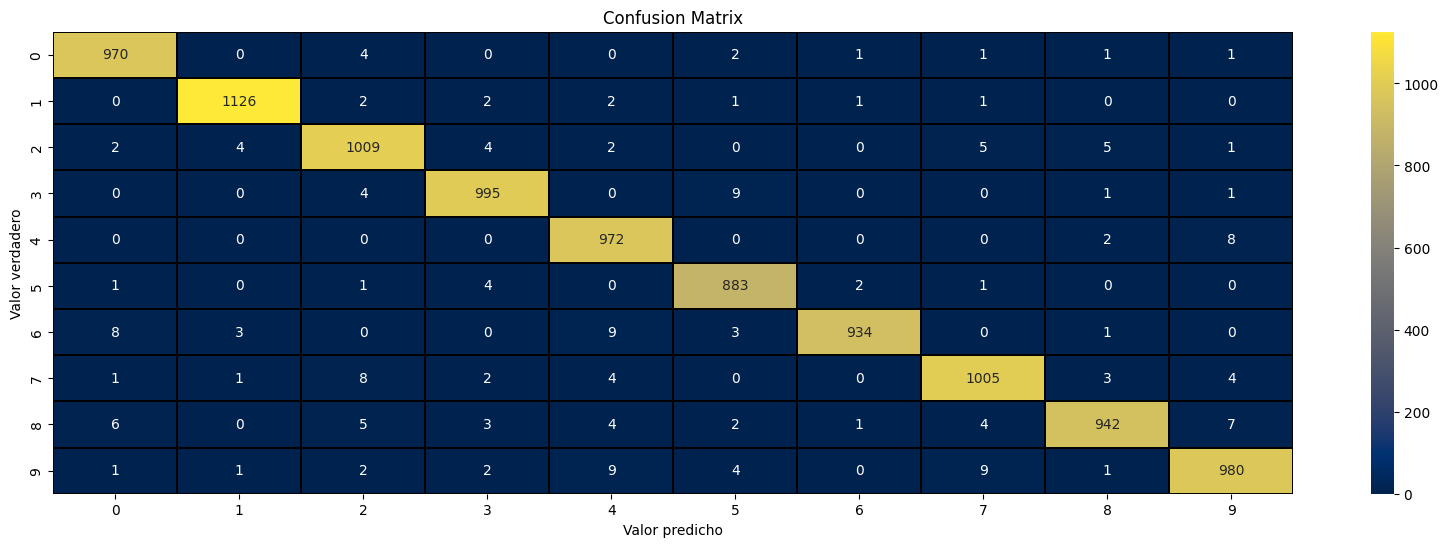

In [98]:
# Graficar matriz de confusión
plt.figure(figsize=(20,6))
sns.heatmap(confusion_matrix(test_labels,predicciones), annot=True,
            linewidths=0.1,cmap="cividis",linecolor="black", fmt= '.0f')
plt.xlabel("Valor predicho")
plt.ylabel("Valor verdadero")
plt.title("Confusion Matrix")
plt.show()

Predecimos en una nueva imagen

In [99]:
# Mostrar la imagen
test_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [102]:
test_images[0].shape

(28, 28)

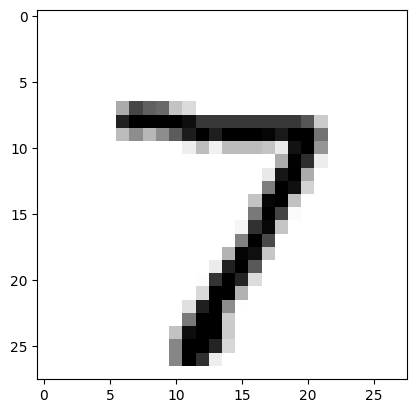

In [100]:
# Graficar
plt.imshow(test_images[0], cmap=plt.cm.binary)

In [105]:
# Predecir
np.argmax(modelo_cnn.predict(test_images[0].reshape(1,28,28,1)))

ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None

In [107]:
# (modelo_cnn.predict(test_images[0].reshape(1,28,28,1)) > 0.5).astype("int32")

Guardar el modelo

In [108]:
modelo_cnn.save('modelo_CNN_numeros.h5')

In [109]:
from keras.applications import VGG19

In [110]:
modelo_vgg19 = VGG19()

574710816/574710816 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [111]:
modelo_vgg19.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 143,667,240 (548.05 MB)

 Trainable params: 143,667,240 (548.05 MB)

 Non-trainable params: 0 (0.00 B)